### Stock Market Prediction And Forecasting Using Stacked LSTM

https://youtu.be/H6du_pfuznE?si=N0-TAlHRoumfNV1b

Yahoo Finance or Alpha Vantage stock market data.

In [4]:
import pandas as pd
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'AAPL'

# Get data from Yahoo Finance
stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2024-01-01')

# Display the first few rows of the dataframe
print(stock_data.head().to_string())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close     Volume
Date                                                                             
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.216293  112117500
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.497498   89113600
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.166641   80962700
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.735229   87754700
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.261612   70790800


In [2]:
url='https://raw.githubusercontent.com/ShilpaSayuraML/DL-course/main/LSTM/STOCK_AAPL.csv'

In [3]:
import pandas as pd
df=pd.read_csv(url)
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [6]:
df1=df.reset_index()['close']

In [7]:
df1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

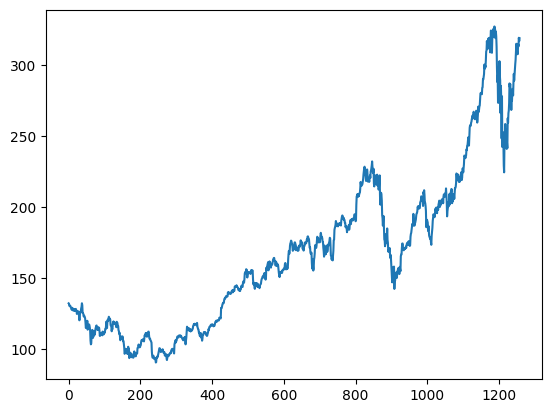

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler


In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
# X_scaled = (X - X_min) / (X_max - X_min)
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1) # values are from zero to 1

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(817, 441)

In [15]:
train_data[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
X_train[1][0][0]

0.1749556700160432

In [30]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


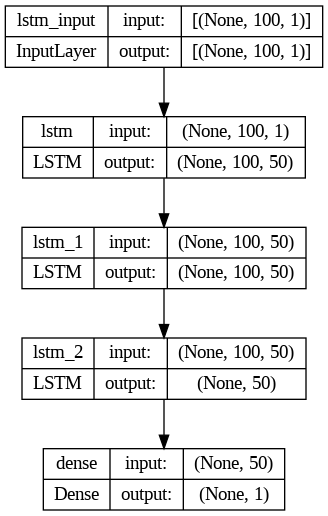

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 396ms/step - loss: 0.0163 - val_loss: 0.0580
Epoch 2/100
12/12 [==============================] - 3s 244ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 3/100
12/12 [==============================] - 3s 280ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 4/100
12/12 [==============================] - 3s 253ms/step - loss: 8.6490e-04 - val_loss: 0.0049
Epoch 5/100
12/12 [==============================] - 2s 200ms/step - loss: 7.1068e-04 - val_loss: 0.0058
Epoch 6/100
12/12 [==============================] - 3s 221ms/step - loss: 6.2895e-04 - val_loss: 0.0055
Epoch 7/100
12/12 [==============================] - 3s 233ms/step - loss: 6.1311e-04 - val_loss: 0.0048
Epoch 8/100
12/12 [==============================] - 3s 299ms/step - loss: 5.6926e-04 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 2s 209ms/step - loss: 5.6966e-04 - val_loss: 0.0036
Epoch 10/100
12/12 [==============================] - 3s 219ms/ste

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.15.0'

In [45]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 40ms/step


In [46]:
train_predict[:10]

array([[0.09178194],
       [0.09183624],
       [0.09175729],
       [0.09262133],
       [0.09436534],
       [0.09732378],
       [0.10259239],
       [0.10745878],
       [0.11033864],
       [0.11325639]], dtype=float32)

In [47]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
train_predict[:10]


array([[0.09178194],
       [0.09183624],
       [0.09175729],
       [0.09262133],
       [0.09436534],
       [0.09732378],
       [0.10259239],
       [0.10745878],
       [0.11033864],
       [0.11325639]], dtype=float32)

In [49]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.013116798754796336

In [50]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.03355268230612611

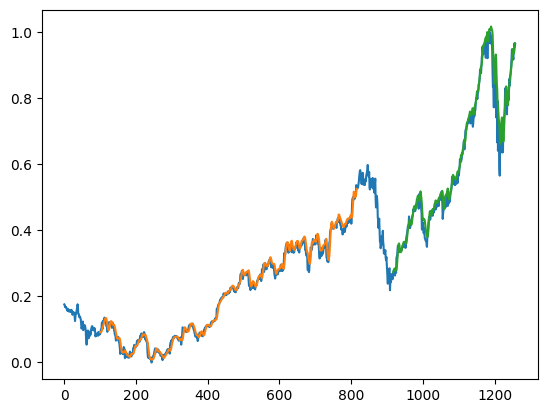

In [51]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
len(test_data)

441

In [53]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [54]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [55]:
temp_input

[0.8583551465000421,
 0.886641898167694,
 0.8743139407244787,
 0.8843198513890063,
 0.8783669678290973,
 0.8986321033521911,
 0.9258211601790087,
 0.928776492442793,
 0.9567677108840664,
 0.9386979650426412,
 0.9330406147091108,
 0.9495060373216246,
 0.9642404796082074,
 0.9551211686228152,
 0.9598919192772102,
 0.9663514312251964,
 0.9624672802499366,
 0.9229502659799036,
 0.9598497002448703,
 0.987925356750823,
 0.9859410622308538,
 0.9253145317909313,
 0.9217259140420502,
 0.9647471079962848,
 0.9757240564046272,
 0.991598412564384,
 0.9697289538123786,
 0.9761462467280251,
 0.967955754454108,
 1.0,
 0.9901629654648316,
 0.9905007177235496,
 0.9653803934813814,
 0.9848855864223591,
 0.9708688676855526,
 0.9402600692392131,
 0.8774803681499619,
 0.8348391454867854,
 0.8541332432660642,
 0.7733682344000674,
 0.7726927298826312,
 0.8801401671873681,
 0.840074305496918,
 0.896732246896901,
 0.8552731571392385,
 0.8388499535590643,
 0.7423372456303302,
 0.8232711306256859,
 0.78143206957

In [56]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9841629]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [57]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [58]:
import matplotlib.pyplot as plt

In [59]:
len(df1)

1258

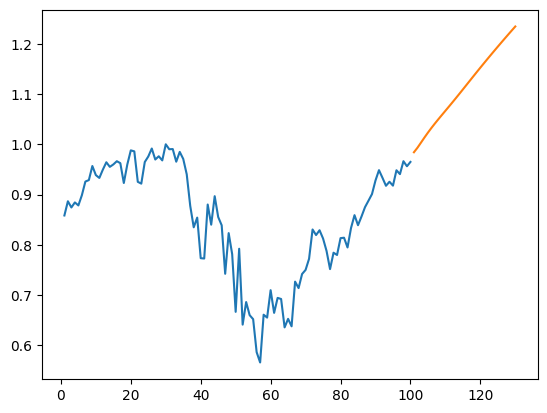

In [60]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

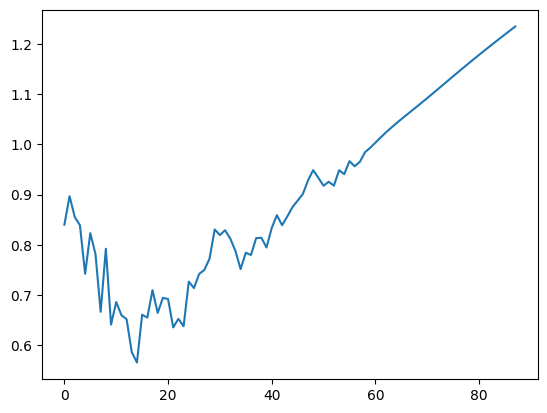

In [61]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [62]:
df3=scaler.inverse_transform(df3).tolist()

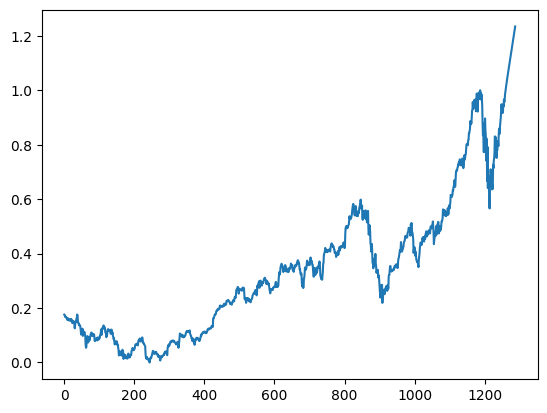

In [63]:
plt.plot(df3)